In [25]:
def process_subtitles(folderdir):
    """
    Given a directory of subtitle files, return list of lists where each sublist
    consists of the subtitles generated for an individual YouTube video.
    """
    
    filenames = os.listdir(folderdir)
    filenames = [folderdir + filename for filename in filenames]
    pattern = r'\d{2}:\d{2}:\d{2}.\d{3}\s-->\s\d{2}:\d{2}:\d{2}.\d{3}'
    
    lines_list = []
    for filename in filenames:
        with open(filename) as f:
            lines_list.append(f.readlines())
    
    processed_list = [] 
    for i in range(len(lines_list)):
        lines = [line.strip() for line in lines_list[i]]
        lines = [line for line in lines if line!=''][3:][:-1]
        lines = [line for line in lines if re.search(pattern, line) is None]
        lines = [line for line in lines if line.split(' ')[0] != "Translated"]
        processed_list.append(lines)  
        
    flattened_list = [list(itertools.chain.from_iterable([line.split(' ') for line in processed_list[i]])) for i in range(len(processed_list))]
    
    return processed_list, flattened_list
    
    

In [26]:
folder_input = "subtitlefiles/"

In [27]:
flattened_list = process_subtitles(folder_input)[1]
processed_list = process_subtitles(folder_input)[0]

In [28]:
flattened_list[0][:10]

['Hello',
 'everyone!',
 'This',
 'time...',
 'I,',
 'Kizuna',
 'AI...',
 'have',
 'received',
 'a']

In [29]:
processed_list[0][:10]

['Hello everyone!',
 'This time...',
 'I, Kizuna AI...',
 'have received a work offer to',
 'bridge and connect the world!',
 'That being...!',
 'The Japan Promotion Ambassador!',
 'Yay~!',
 'So that more people from all around the world come to visit Japan,',
 'I have this job to introduce the good and amazing points of Japan!']

Combine list of lists into one list

In [30]:
merged_list = list(itertools.chain.from_iterable(flattened_list))

In [31]:
len(merged_list)

314357

In [32]:
merged_list[:10]

['Hello',
 'everyone!',
 'This',
 'time...',
 'I,',
 'Kizuna',
 'AI...',
 'have',
 'received',
 'a']

In [33]:
STOPWORDS = stopwords.words("english")

In [34]:
lowercase_list = [w.lower().strip(string.punctuation) for w in merged_list]

In [35]:
filtered_list = [w for w in lowercase_list if w not in STOPWORDS and w!='']

In [37]:
filtered_list[:21]

['hello',
 'everyone',
 'time',
 'kizuna',
 'ai',
 'received',
 'work',
 'offer',
 'bridge',
 'connect',
 'world',
 'japan',
 'promotion',
 'ambassador',
 'yay',
 'people',
 'around',
 'world',
 'come',
 'visit',
 'japan']

In [13]:
Counter(filtered_list).most_common(20)

[('ai', 4204),
 ('like', 2658),
 ('right', 2598),
 ('ah', 2327),
 ('♪', 2058),
 ('well', 1932),
 ('good', 1359),
 ("i'm", 1355),
 ('eh', 1199),
 ('see', 1191),
 ('one', 1170),
 ('yes', 1125),
 ('really', 1092),
 ('want', 1054),
 ('go', 1037),
 ('oh', 1030),
 ('kizuna', 1016),
 ("let's", 967),
 ('think', 959),
 ('know', 912)]

In [14]:
from wordcloud import WordCloud

In [15]:
wc = " ".join(filtered_list)

In [16]:
wordcloud = WordCloud().generate(wc)

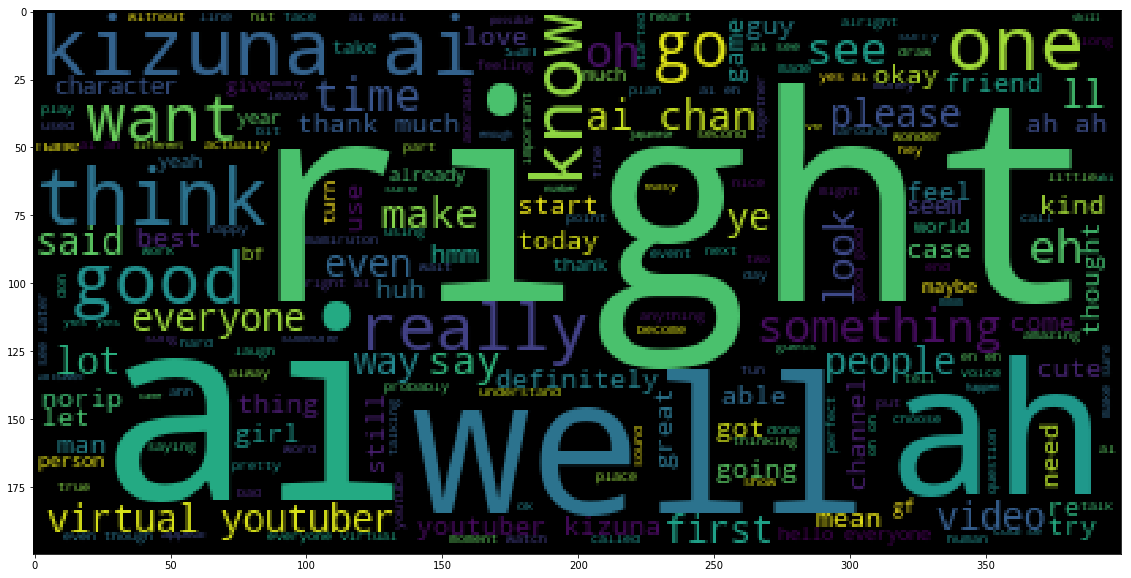

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)

Create a dictionary to store name of video and processed subtitles

In [18]:
d = dict()

In [19]:
videoname = os.listdir("subtitlefiles/")

In [20]:
for i, subtitle in enumerate(flattened_list):
    d[videoname[i]] = subtitle

Save to pickle file

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [21]:
import pickle

In [22]:
def save_obj(obj, name):
    with open('obj/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [23]:
save_obj(d, 'processed_video_subtitle')

In [24]:
save_obj(processed_list, 'line_by_line_subtitle')